# ![](https://ga-dash.s3.amazonaws.com/production/assets/logo-9f88ae6c9c3871690e33280fcf557f33.png)  Bayesian Statistics and Politics
Week 8 | Lab 2.3

Given the unexpected US Presidential results, let's have a look back to simpler times (1988 Presidential election) and find a bit more about how Bayesian analysis is utilised for such modelling.

# Some model background

#### 2.1 Priors and Conjugate Priors

### &nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;Conjugate Priors
| Prior  | Likelihood  | 
|---|---|
 | Beta  | Binomial  |
 | Dirichlet  | Multinomial   | 
 | Gamma  | Gaussian |
 | Gaussian  | Gaussian | 
 
 The above table provides the likelihood/prior conjugate prior combinations that ensure computational tractability for calculation of posterior distributions 
 
 | Name  | Probability Density Function (PDF) | Use
|---|---|
| Beta  | $\frac{1}{B(\alpha, \beta)}x^{\alpha-1}(1-x)^{\beta-1}$ | More of a family of distributions, usually representing probabilties of proportions, thus it's great to use as our prior belief (very important in Bayesian analysis)|
| Dirichlet  |  $\begin{equation*}\frac{1}{B(\alpha, ,\beta)}\prod_{i = 1}^{n}x_i^{\alpha-1}\end{equation*}$  | Similar to Beta above, just extended over multinomials, often used in NLP and other text-mining processes  |
| Gamma  |$ x^{a-i}e^{-x}\frac{1}{\Gamma(a)}$ | This distribution represents waiting time between Poisson distributed events (remember c_i in the previous lecture finger exercise | 
| Gaussian  | $\frac{1}{\sigma \sqrt(2\pi)}e^{\frac{-(x-\mu)^{2}}{2\sigma^2}}$ | This is just the normal distribution | 
| Binomial  | $\binom{n}{k}\cdot p^kq^{n-k} $   | Gives you the probability of getting k "success" in n iterations/trials |
| Multinomial  | $\frac{N!}{\prod_{i=1}^n x_i!} \prod_{i=1}^n \theta_i^{x_i} $| Similar to binomial distribution, but generalized to include multiple "buckets" (X, Y, Z,...) instead of just two (1 or 0), represents how many times each bucket X, Y, Z,... etc was observed over n trials | 

The beta distribution is particularly of interest. It is defined on the interval between 0 and 1 (inclusive), so it is a natural choice for describing probabilities. Additionally if the prior used is a beta distribution and we do an update using a binominal likelihood, then the posterior will also be beta distributed. This is the property of **conjugate prior**, in that both prior and posterior follow the beta distribution. The shape of a beta distribution depends on the two parameters $\alpha$ and $\beta$ (much as the normal distribution is defined by the mean and variance). We can set an uninformative prior that is flat if we set $\alpha=1$ and $\beta=1$.

Furthermore the parameters of the two distributions will be linked straightforwardly in the binomial case; in a binomial update the posterior parameters will take simple summations on the number of observations of each of the two classes seen; the $\alpha$ becomes $\alpha$ + number of positive cases, and $\beta$ becomes $\beta$ plus number of negative cases.

$$pdf\;of\;\beta\;distribution = \frac{1}{B(\alpha, \beta)}x^{\alpha-1}(1-x)^{\beta-1}$$

The $B(\alpha, \beta)$ is the beta function which forms a normalising constant ensuring the total probability integrates to 1 (so i.e. the area under the curve of the beta distribution is 1).

$$B(a,b) = \frac{\Gamma(a)\Gamma(b)}{\Gamma(a+b)}$$

The gamma function $\Gamma(n)=(n-1)!$ for positive integers, and an integral function for non-integers (this is implemented in python's math module). As it is used in Bayesian Analysis, the beta distribution is often used to represent the prior beliefs of the modeler. Let's say you thought the chance of a political candidate winning an election was .60 (whatever that means), but that given new information, that you've cleverly modeled using Bayes, it's now .80 (say you've tied your candidates political fortunes to the performance of the economy), your prior beliefs can be modeled (after some tuning of $\alpha$, $\beta$, the input variable) by the beta distribution. The beta function  is then used as a scaling term that ensures your model is bounded by (0, 1).

In [1]:
from __future__ import division
import numpy as np
import math
from scipy.special import gamma as Gamma
from scipy.stats import beta
import matplotlib.pyplot as plt
%matplotlib inline

Let's build up some intuition on these distributions with some plotting and making some functions.
Read the whole of this long first answer [here](http://stats.stackexchange.com/questions/47771/what-is-the-intuition-behind-beta-distribution) about betas. See the documentation in scipy [here](https://docs.scipy.org/doc/scipy-0.18.1/reference/generated/scipy.stats.beta.html)

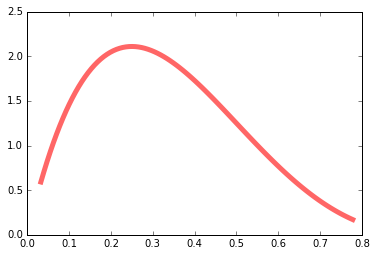

In [38]:
# Building up a Bayesian update: implement the Beta distribution pdf into Python 
# using 1) the scipy beta 2) the math library (the interesting thing is it encounters
# problems with underflow/overflow due to floating point accuracy, but scipy fixes this)
# note: x should be bounded by 0 and 1, y is the pdf function, alpha and beta your paramaters to vary

from scipy.stats import beta
import matplotlib.pyplot as plt
%matplotlib inline
fig, ax = plt.subplots(1, 1)
a, b =  2,4
mean, var, skew, kurt = beta.stats(a, b, moments='mvsk')
x = np.linspace(beta.ppf(0.01, a, b), beta.ppf(0.99, a, b), 100)
ax.plot(x, beta.pdf(x, a, b),'r-', lw=5, alpha=0.6, label='beta pdf')
plt.show()

#Now try out some different values for alpha and beta (a and b). 
#Try (2,2), (2,4), (4,2), (2,8), (20,80). Just play with it and see how the pdf changes
# as you add numbers to the alpha and beta iteratively.


#### Aside: Introducing Dirchilet Distribution for Multi-level Categorical Analysis

In the longer term, our main aim is to model the quotient, in particular, the percentage of voters for a particular candidate. The commonest way to do this is to utilise the Dirichlet distribution in our probability model: $\begin{equation*}\frac{1}{B(\alpha)}\prod_{i = 1}^{n}x_i^{\alpha-1}\end{equation*}$.

As you read in the summary in the table above, it's often used to model situations with more than "2" possiblities/buckets/outcomes. This is in fact a very powerful distribution. For our purposes, we would use this distribution to model situations where there are more than 2 candidates (e.g. Clinton, Bush, Perot in 1992). But for this lab,  let's assume there's just two alternatives. That way, we can utilize the simple binomial model and as our table states, we just need to use beta for that case.

# Prepping the data

This case study will use data from: http://www.stat.columbia.edu/~gelman/arm/examples/election88/, from Andrew Gelman, one of the foremost researchers in Bayesian analysis. This 1988 election between Bush and Dukakis was ultimately a major victory for the Republicans, and propelled George H.W. Bush into the presidency. 

In [30]:
import pandas as pd

# Reading in the csv file
pre_poll = pd.read_csv('./assets/datasets/polls.csv')

# The first column "Unnamed" is clearly just a row-identifer machine generated. We can ignore that column or drop it all together
del pre_poll['Unnamed: 0']
del pre_poll['org']
pre_poll.head()

,year,survey,bush,state,edu,age,female,black,weight
0,1,9152,1.0,7,2,2,1,0,1403
1,1,9152,1.0,33,4,3,0,0,778
2,1,9152,0.0,20,2,1,1,0,1564
3,1,9152,1.0,31,3,2,1,0,1055
4,1,9152,1.0,18,3,1,1,0,1213


Now that we have the data read in, we would like to partition the data into states so we can do state-specific inference 

Summarize the age variable with counts

In [31]:
# Determine the number of yers of the data
pre_poll.age.value_counts()

2    4788
3    3429
1    3149
4    2178
Name: age, dtype: int64

Summarize the state with counts

In [32]:
# Determine the number of entities/states of the data
pre_poll.state.value_counts()

5     1493
33     894
44     788
10     750
39     616
36     605
14     567
23     530
31     428
48     393
50     389
22     373
47     354
34     346
43     329
11     316
26     309
15     291
24     289
21     284
41     223
25     220
18     210
1      203
19     196
3      194
6      181
7      171
38     149
16     143
17     141
37     130
28     125
4      121
49     117
32     109
40      91
45      79
42      60
35      60
20      51
13      42
27      40
8       39
29      32
30      27
9       19
51      15
46      12
Name: state, dtype: int64

Great, now let's do some basic exploratory analysis on the polling data. Let's construct the Bush support for state-age cohorts and save that data for use in the dictionary container.

In [42]:
container ={}
for state in pre_poll['state'].unique(): 
    c1 = pre_poll['state'] == state
    subset_interest = pre_poll[c1]  # Subsetting the data 
    container2 = {}
    for age in pre_poll['age'].unique():
        c2 = subset_interest['age'] == age
        subset_interest2 = subset_interest[c2]  # Subsetting the data
        contain2 = subset_interest2['bush'].unique()  
        contain2 = contain2[~np.isnan(contain2)]     
        if len(contain2) == 2:
            bush_quotient = float(subset_interest2['bush'].value_counts()[1])/(float(subset_interest2['bush'].value_counts()[1])+float(subset_interest2['bush'].value_counts()[0]))
            temp_age = age
            container2[temp_age] = bush_quotient
    temp_name = str(state)
    container[temp_name] = container2

In [47]:
# Likewise, let's also produce a dictionary with the general poll percentages for state (no age)

container2 ={}
for state in pre_poll['state'].unique(): 
    c1 = pre_poll['state'] == state
    subset_interest = pre_poll[c1]  # Subsetting the data 
    contain = subset_interest['bush'].unique()  
    contain = contain[~np.isnan(contain)]   # Remove the NaNs - Think why can't we use dropna()? 
    if len(contain) == 2:
        bush_quotient = float(subset_interest['bush'].value_counts()[1])/(float(subset_interest['bush'].value_counts()[1])+float(subset_interest['bush'].value_counts()[0]))
        temp_name = str(state)
        container2[temp_name] = bush_quotient

You can also probably do something similar to the method above by utilizing the groupby method in Pandas.

In [48]:
# Write your optional procedure here


Let's just check out what # 1 on container2 shows (all ages). This has a poll average for Bush for each state, numbered (you can check the numbers t the previous).

In [49]:
container2

{'1': 0.710691823899371,
 '10': 0.6380655226209049,
 '11': 0.5871212121212122,
 '13': 0.5,
 '14': 0.5323590814196242,
 '15': 0.6743295019157088,
 '16': 0.3893805309734513,
 '17': 0.6929133858267716,
 '18': 0.5956284153005464,
 '19': 0.6449704142011834,
 '20': 0.5102040816326531,
 '21': 0.4959349593495935,
 '22': 0.4646153846153846,
 '23': 0.5548098434004475,
 '24': 0.5166666666666667,
 '25': 0.6984126984126984,
 '26': 0.467680608365019,
 '27': 0.4,
 '28': 0.5882352941176471,
 '29': 0.625,
 '3': 0.5892857142857143,
 '30': 0.6666666666666666,
 '31': 0.5564738292011019,
 '32': 0.5416666666666666,
 '33': 0.43114543114543114,
 '34': 0.6061643835616438,
 '35': 0.5555555555555556,
 '36': 0.6257197696737045,
 '37': 0.5304347826086957,
 '38': 0.5161290322580645,
 '39': 0.528046421663443,
 '4': 0.5841584158415841,
 '40': 0.3333333333333333,
 '41': 0.6721311475409836,
 '42': 0.5714285714285714,
 '43': 0.6758620689655173,
 '44': 0.5659025787965616,
 '45': 0.782608695652174,
 '46': 0.58333333333333

In [45]:
# We also have the actual Election 88 sample percentages to compare with the polling. Let's load the data 
# just to have a look
import pandas as pd

election88_dat = pd.read_csv('./assets/datasets/election88.csv')
del election88_dat["Unnamed: 0"]
election88_dat.head()

,stnum,st,electionresult,samplesize,raking,_merge
0,1,AL,0.59,203,0.673067,3
1,2,AK,0.60,0,NaN,1
2,3,AZ,0.60,194,0.568980,3
3,4,AR,0.56,121,0.563672,3
4,5,CA,0.51,1493,0.531725,3


So the electoral data shows that the actual results for state 1, i.e. Alabama, were .59, whereas the polling showed .71. Does that mean Bush lost such a chunk of his support from the time of the poll to the election? We can put some clarity on this question by doing a Bayesian computation. What we have to calculate is the following. In the new poll for Alabama, 203 persons participated. Our prior probability based on the previous poll says that 71 % of these persons would vote Bush. The likelihood function however is based on the election results that only 59 % of these persons would vote for Bush. Updating the prior probability by the likelihood function will allow us to calculate the posterior probability  given that we obtained the election results.

### Combining The Prior and Likelihood 

We see from the table way back at the top that using the combination of a Beta distribution for the prior probability and a binomial distribution for the likelihood allows us to write down the posterior probability distribution immediately without any further calculation (which for the normalisation factor could be cumbersome due to summation or integration). It will be a Beta distribution, too, but with different shape parameters than the prior probability distribution.

Recall Bayes rule:

### $$P\left(\;hypothesis\;|\;data\;\right) = \frac{P\left(\;data\;|\;hypothesis\;\right)P\left(\;hypothesis\;\right)}{P\;(\;data\;)} $$


- $P\;(\;hypothesis\;)$ - the probability of the hypothesis before we see any data; this is the _prior_
- $P\;(\;data\;|\;hypothesis\;)$ - the probability of the data under the hypothesis; this is the _likelihood_
- $P\;(\;hypothesis\;|\;data\;)$ - the probability of the hypothesis after we see the data; this is the _posterior_
- $P\;(\;data\;)$ - the probability of the data under any hypothesis; this is the _normalising constant_

Our prior distribution will be the Beta distribution

$$pdf\;of\;\beta\;distribution = f_{Beta}(\theta;\alpha,\beta) = \frac{1}{B(\alpha, \beta)}\theta^{\alpha-1}(1-\theta)^{\beta-1}$$

whereas our likelihood function will be a binomial distribution 
$$pdf\;of\;binomial\;distribution= f_{Binom}(\theta;n,k) = \binom{n}{k} \theta^k(1-\theta)^{n-k} $$

The unknown distribution parameter which we want to estimate is $\theta$, the probability of how many people will vote for Bush. We have $0<\theta<1$. We are going to estimate probabilities for theta by observing $k$, the parameter in the binomial distribution wheras n is fixed (the size of the group of persons we are considering). 

From the prior distribution and likelihood function we can calculate the posterior probability distribution in closed form. Its general form is 
$$\pi(\theta|k)=\frac{f(k|\theta)\pi(\theta)}{\int_{\theta}d\theta\, f(k|\theta)\pi(\theta)}
\propto \theta^k(1-\theta)^{n-k}\theta^{\alpha-1}(1-\theta)^{\beta-1}
= \frac{\theta^{k+\alpha-1}(1-\theta)^{n-k+\beta-1}}{B(k+\alpha,n-k+\beta)}
= f_{Beta}(\theta;k+\alpha,n-k+\beta)\ .$$
In the second step, we used $\propto$ instead of equality as we left out the proper normalisation factors which we only fixed in the second last step. This we could do easily by recoginising that the posterior probability distribution has the shape of a Beta distribution whose normalisation factor we know.

Now, we make the calculation for the posterior probability explicit by inserting the results from the election in Alabama.
In the election results 203 persons participated, i.e. $n=203$. Our likelihood function given by a binomial distribution is  based on the election results, where 59 % voted for Bush, i.e. $k=120$ persons, and 41 % against Bush, i.e. $n-k=83$ persons. The prior is given by a Beta distribution based on the previous poll with 71 % pro Bush. That corresponds to $\alpha=144$ persons pro and $\beta=59$ against Bush. 

Inserting these values into the above equation for the posterior probability distribution gives
$$\pi(\theta| k=120)= \frac{\theta^{120+144-1}(1-\theta)^{83+59-1}}{B(120+144,83+59)}
= \frac{1}{B(264,142)} \theta^{263}(1-\theta)^{141}
= f_{Beta}(\theta;264,142)\ .$$

We can use this posterior probability density to obtain the probability that not more than a certain fraction $x$ of voters will vote for Bush. To obtain this probability, we have to integrate the posterior probability distribution over $\theta$ up to some value $x$:
$$P(\theta\le x)= \frac{1}{B(264,142)}\int_{0}^x d\theta\, \theta^{263}(1-\theta)^{141}
= \int_0^x d\theta\, f_{Beta}(\theta;264,142)$$
where in the last step we identified the previous expression as a beta distribution.
This expression we can calculate for any $x$ using scipy stats (https://docs.scipy.org/doc/scipy-0.18.1/reference/generated/scipy.stats.beta.html).
Let's do that for a few different values (cdf stands for cumulative distribution function):

In [60]:
from scipy import stats
a = 264
b = 142
beta.cdf(.71,a,b)

0.99524802717862004

After the election, the result is fixed, but the result for the posterior probability tells us how likely the result has been.
So, given the election results,
it is very likely that less than 71 % of the voters vote for Bush (almost 100 %), likely that less than 65 % of the voters vote for Bush (a bit less than 50 percent), very unlikely that less than 50 % of the voters vote for Bush (nearly zero).
Let's plot the dependence of the cumulative distribution function on $x$:

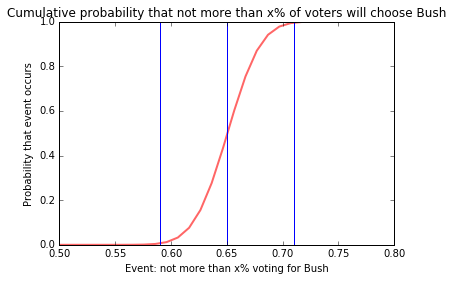

In [78]:
fig, ax = plt.subplots(1, 1)
a = 264
b = 142
mean, var, skew, kurt = beta.stats(a, b, moments='mvsk')
x = np.linspace(0, 1, 100)
ax.plot(x, beta.cdf(x, a, b),'r-', lw=2,alpha=0.6, label='beta pdf')
plt.axvline(.71)
plt.axvline(.65)
plt.axvline(.59)
plt.xlim(.5,.8)
plt.xlabel("Event: not more than x% voting for Bush")
plt.ylabel("Probability that event occurs")
plt.title("Cumulative probability that not more than x% of voters will choose Bush")
plt.show()

In [7]:
# Binning the data
